In [1]:
'''
This notebook applies several popular regressors of classic machine learning algorithms
to the data set used in network_profile_recommender project 
(see https://github.com/fleapapa/network_profile_recommender).

This notebook trains the regressors with 2M data samples of observed network metrics.

Another notebook, https://github.com/fleapapa/network_performance_prediction/blob/master/sklearn/regressors.ipynb,
does similarly, except its training data includes pre-aggregated values of observed metrics.
'''
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

import random
import pandas
import numpy
import tensorflow
import time

from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets, metrics
from sklearn.cross_validation import train_test_split

# import various kinds of regressors
from sklearn import ensemble
from sklearn import tree
from sklearn import neighbors
from sklearn import linear_model

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%%time
# use the same dataset as used by recommender
df_raw = pandas.read_csv('../data/etl2M.csv',header=None)
df_x = df_raw.ix[:, (1,3,6,9,12,15)]   # x = features (observations)
df_y = df_raw.ix[:, 18]                # y = labels

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, 
    test_size=1000, 
    random_state=42,
    )

CPU times: user 4.51 s, sys: 436 ms, total: 4.95 s
Wall time: 4.95 s


In [3]:
algorithms = {
    'DecisionTreeRegressor':      tree.DecisionTreeRegressor(),
    'ExtraTreeRegressor':         tree.ExtraTreeRegressor(),
    'RandomForestRegressor':      ensemble.RandomForestRegressor(n_estimators=40),
    'AdaBoostRegressor':          ensemble.AdaBoostRegressor(),
    'GradientBoostingRegressor':  ensemble.GradientBoostingRegressor(),
    'KNeighborsRegressor':        neighbors.KNeighborsRegressor(5, weights='distance'),
    'LinearRegression':           linear_model.LinearRegression(),
    'LogisticRegression':         linear_model.LogisticRegression(),
    'BayesianRidge':              linear_model.BayesianRidge(),
}                                  

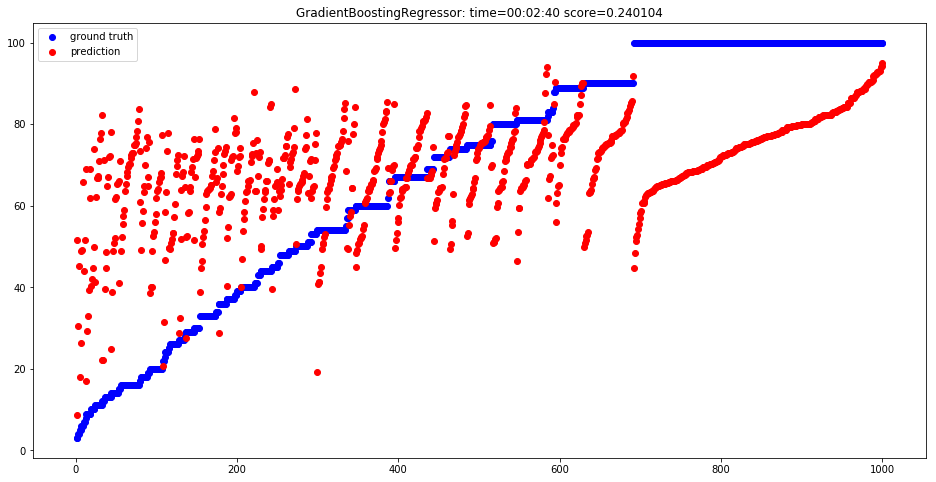

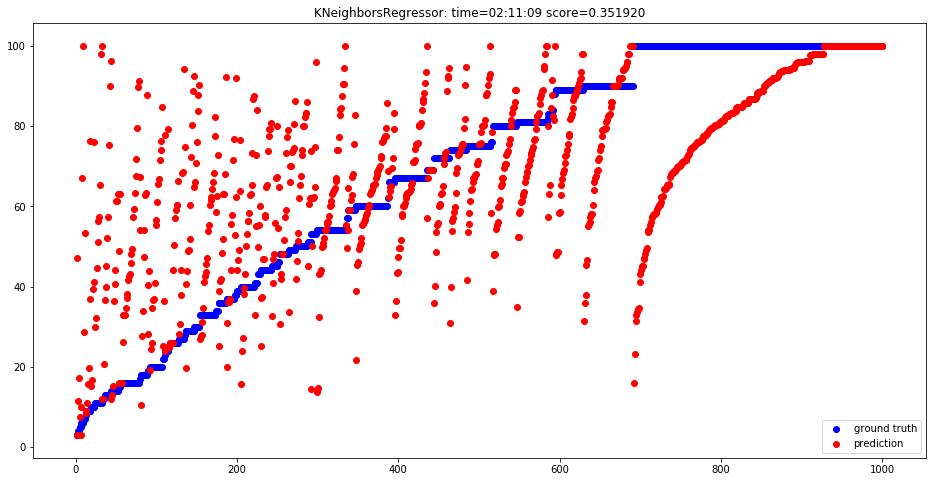

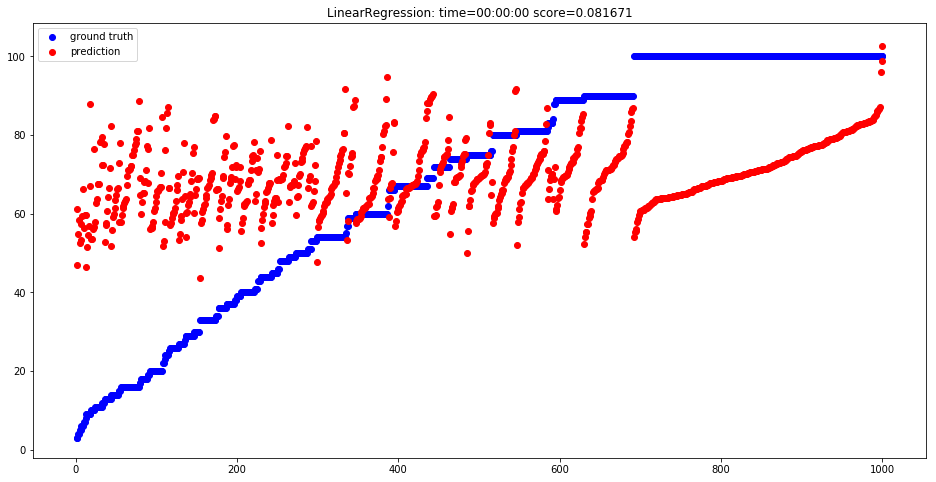

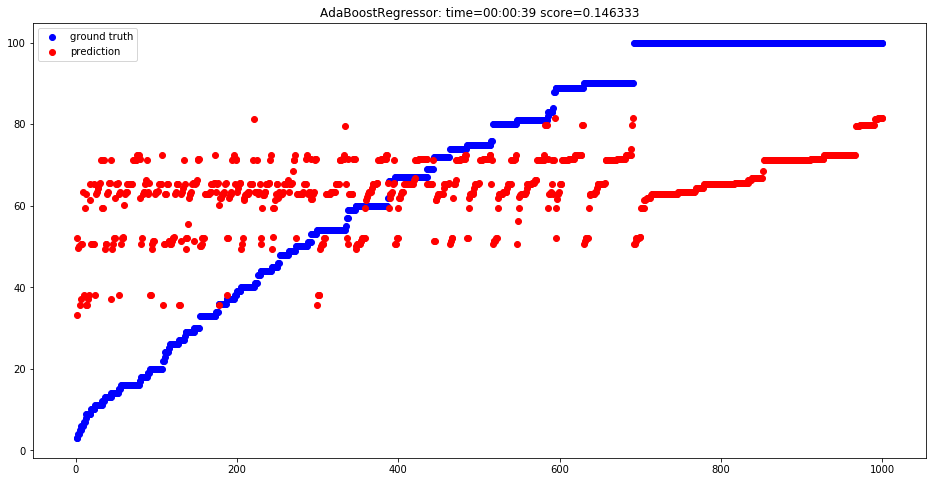

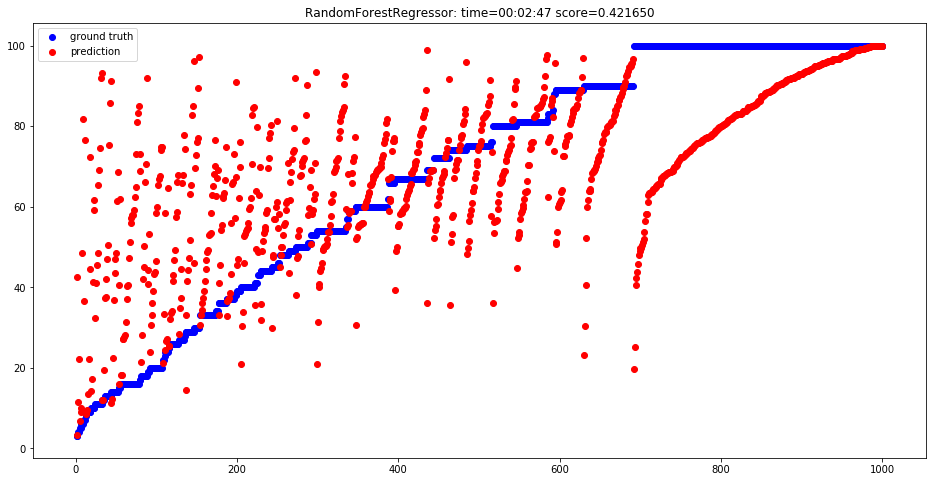

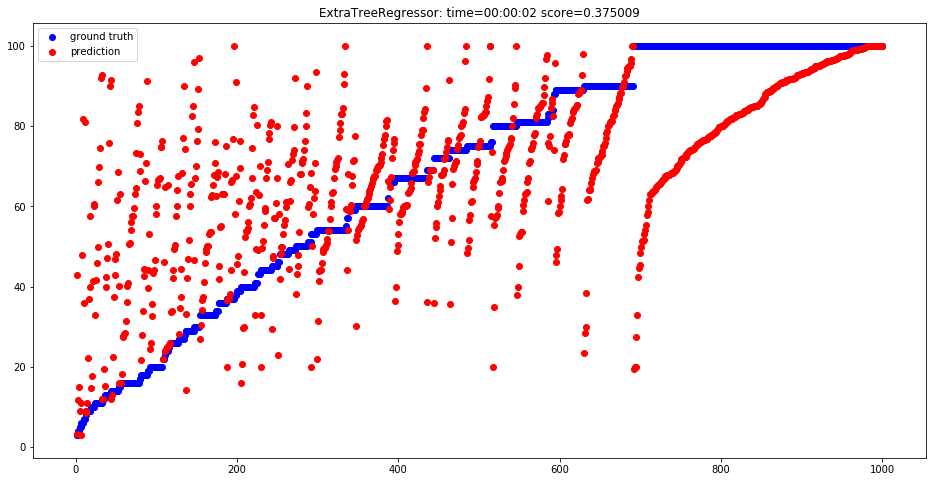

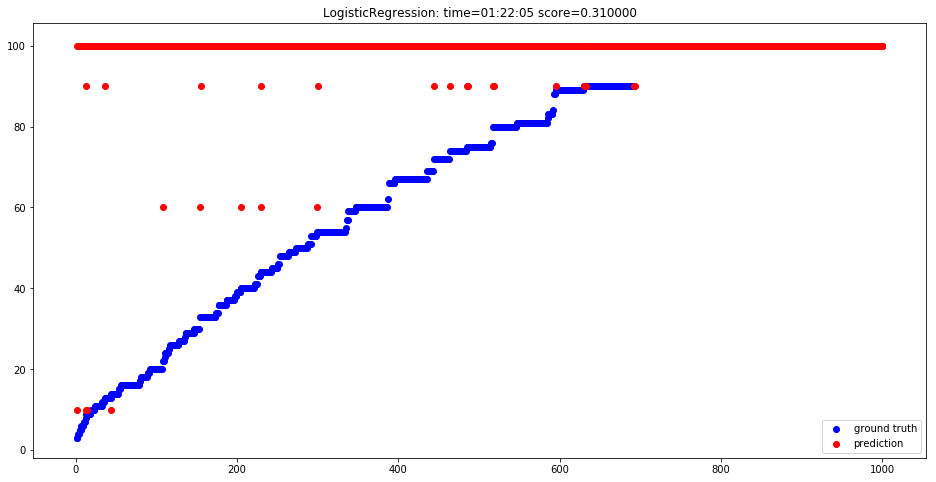

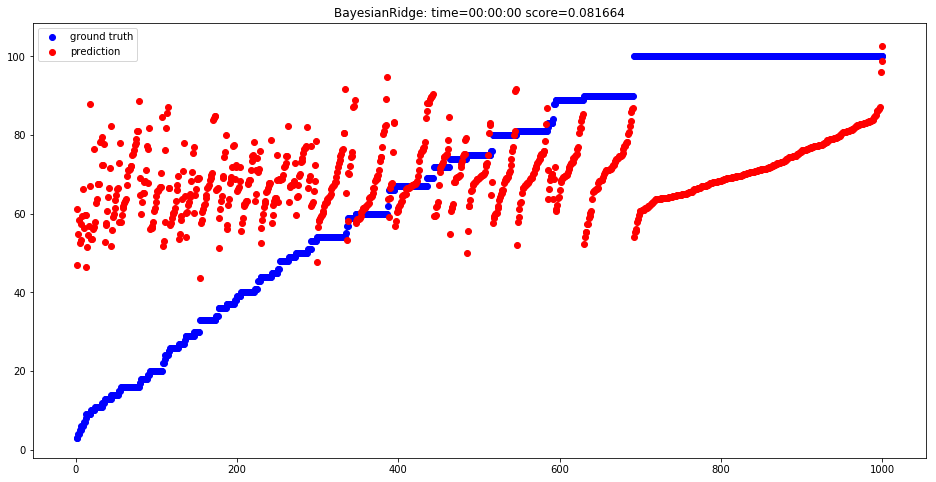

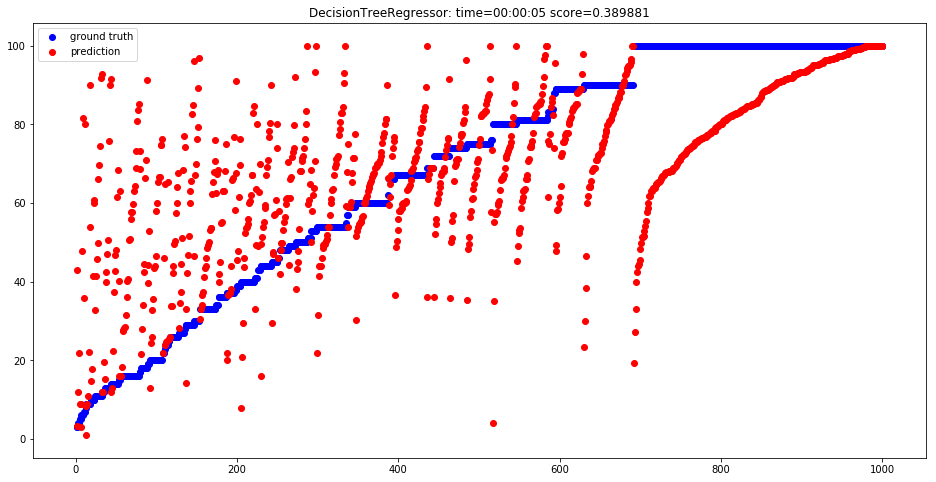

CPU times: user 3h 39min 32s, sys: 8.68 s, total: 3h 39min 41s
Wall time: 3h 39min 35s


In [4]:
%%time
for algo_name in algorithms:
    tstart = time.time()
    algorithm = algorithms[algo_name]
    model = algorithm.fit(x_train, y_train)
    y_predicted = model.predict(x_test)                                                                                                              
    tend = time.time()

    tsec = tend - tstart
    tmin = tsec // 60
    tsec = tsec %  60
    thrs = tmin // 60
    tmin = tmin %  60
    tuse = 'time=%02d:%02d:%02d' % (thrs, tmin, tsec)

    score = model.score(x_test, y_test)
    score = 'score={0:f}'.format(score)

    # sort to make plot look not so fuzzy
    # intact y_test & y_predicted for next algorithm !!!
    p_test, p_predicted = zip(*sorted(zip(y_test, y_predicted)))

    fig, ax = plt.subplots()
    fig.set_size_inches(16, 8)
    plt.scatter(numpy.arange(1, x_test.shape[0]+1, 1), p_test,      c='b', label='ground truth') 
    plt.scatter(numpy.arange(1, x_test.shape[0]+1, 1), p_predicted, c='r', label='prediction')                                                                                                  
    plt.axis('tight')                                                                                                                           
    plt.legend()                                                                                                                                
    plt.title("%s: %s %s" % (algo_name, tuse, score))                                                                                                                                      
    plt.show()                                                                                                                                      
    plt.savefig("/data/tmp/%s.png" % algo_name) 